In [1]:
from pyhgf import load_data
from pyhgf.model import HGF
import pandas as pd

# load example dataset
timeseries = load_data("continuous")

# Exercise 1

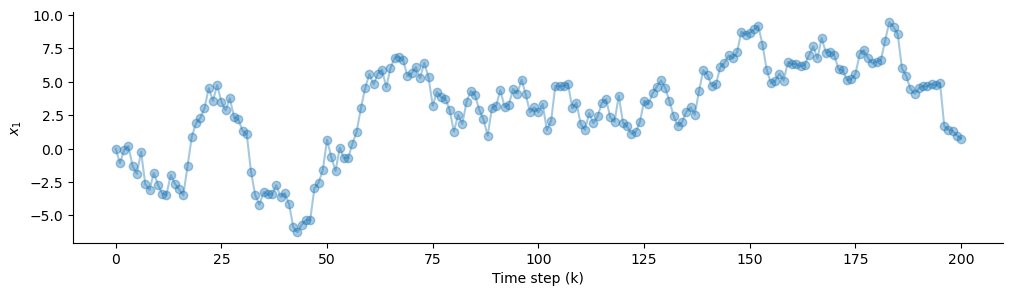

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(123)

# random walk
x_1 = np.cumsum(np.random.normal(loc=0, scale=1, size=200))  # GRW
x_1 = np.insert(x_1, 0, 0)  # starting at 0

plt.figure(figsize=(12, 3))
plt.plot(x_1, "o-", alpha=.4);
plt.xlabel("Time step (k)");
plt.ylabel("$x_{1}$");
sns.despine()

# Exercise 2

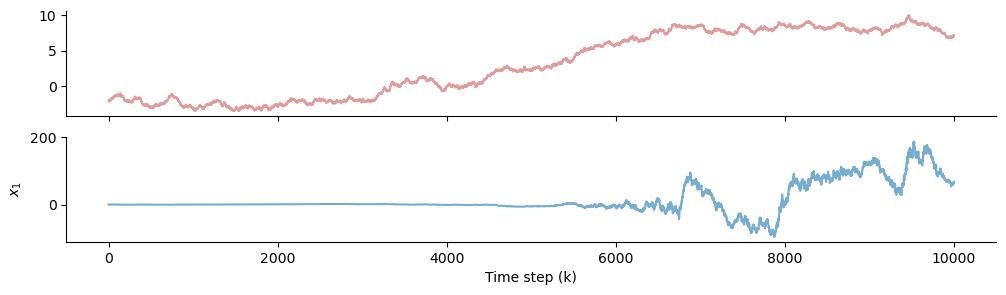

In [3]:
np.random.seed(123)
omega_1 = -6.0
omega_2 = -6.0
mu_1 = 0.0
mu_2 = -2.0
x_1 = [0]
x_2 = [-2]

# two-level hierarchical gaussian random walk
for i in range(10000):

    # x2
    pi_2 = np.exp(omega_2)
    mu_2 = np.random.normal(mu_2, pi_2**.5)
    x_2.append(mu_2)

    # x1
    pi_1 = np.exp(mu_2 + omega_1)
    mu_1 = np.random.normal(mu_1, pi_1**.5)

    x_1.append(mu_1)

_, axs = plt.subplots(figsize=(12, 3), nrows=2, sharex=True)
axs[0].plot(x_2, "-", color="indianred", alpha=.6);

axs[1].plot(x_1, "-", alpha=.6);
axs[1].set_xlabel("Time step (k)");
axs[1].set_ylabel("$x_{1}$");
sns.despine()

# Exercise 3

Creating a continuous Hierarchical Gaussian Filter with 2 levels.
Add 614 new continuous observations.


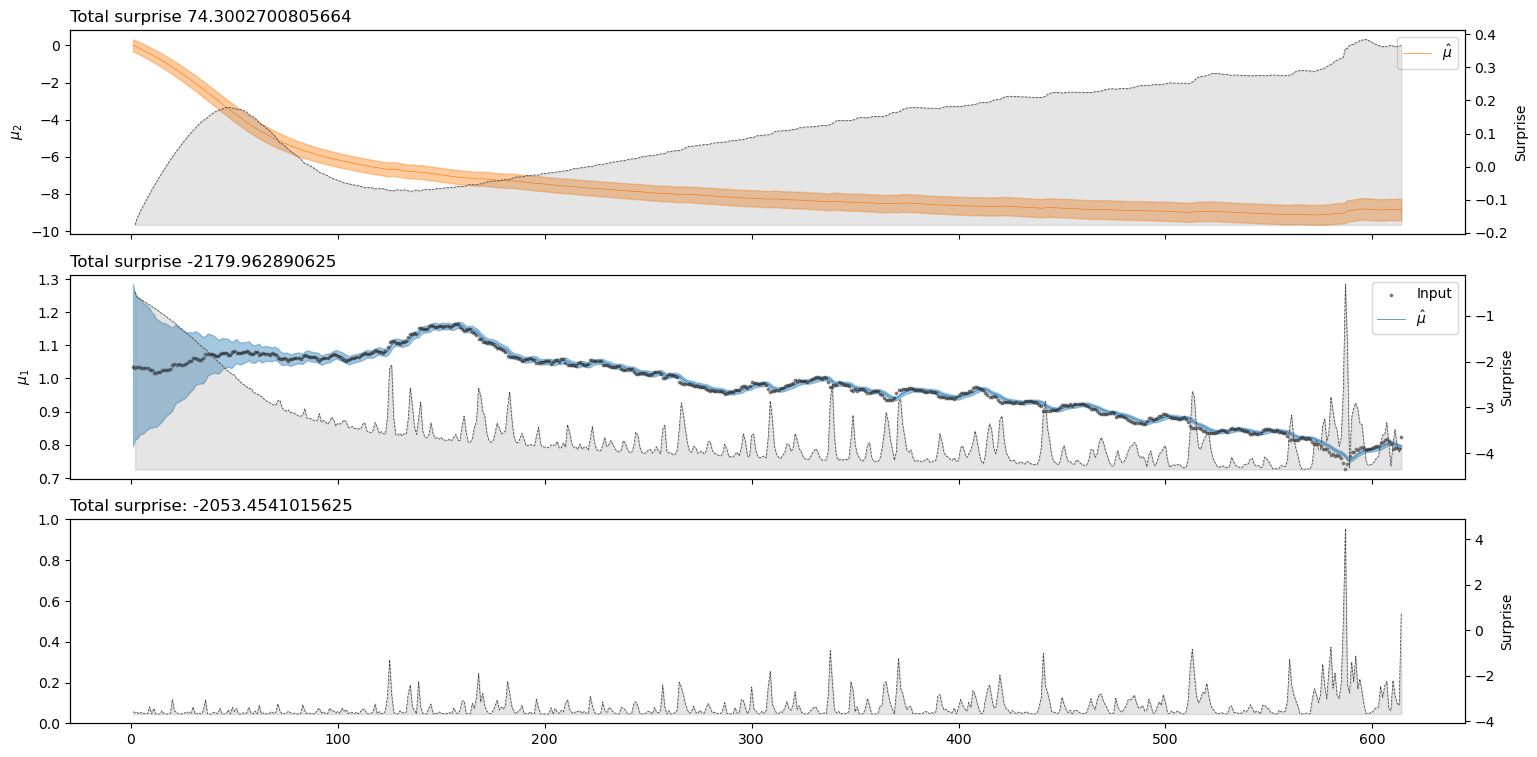

In [13]:
# create a two-levels continuous HGF with defaults parameters
two_levels_continuous_hgf = HGF(
    n_levels=2,
    model_type="continuous",
    initial_mu={"1": 1.04, "2": 0.0},
    initial_pi={"1": 1e2, "2": 1e1},
    omega={"1": -3.0, "2": -6.0},
)
two_levels_continuous_hgf.input_data(input_data=timeseries).plot_trajectories();

In [20]:
two_levels_continuous_hgf.surprise()

Array(-2053.4543, dtype=float32)

# Exercise 4

In [ ]:
https://renewables.ninja/